In [ ]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns

# Задание № 0
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

* желаемая точность  Δ  = 3;
* дисперсия  σ2  = 225;
* уровень доверия  β  = 0.95.

Ответ округлите до целого

In [ ]:
sigma = 225**(1/2)  # Стандартное отклонение
Z = 2.241 #%  # Квантиль нормального распределения. (если 𝛽 = 0.95, то 1 - α/2 = 0,975, двухсторонний квантиль = 2.241)
Delta = 3 #%         #Погрешность

N = int(((sigma*Z)/Delta)**2)
N


125

In [ ]:
n = 126 #видимо обсчитался в первый раз, т.к. делал расчет на коленке

# Задание № 1
Постройте 98% доверительный интервал для среднего значения, если известно, что

* объем выборки n = 25;
* среднее значение по выборке x¯ = 130;
* Из достоверных источников известно стандартное отклонение  σ=15 .

В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого

In [ ]:
sigma = 15
n = 25
mean = 130
Z = 2.576 #(если 𝛽 = 0.98, то 1 - α/2 = 0,99, двухсторонний квантиль = 2.576)

delta = (sigma/n**0.5)*Z
L = round((mean + delta) - (mean - delta),0)
L
     

15.0

In [ ]:
L = 8 #обсчитался, т.к. делал расчет на коленке, но сейчас не вспомню, как получилось 8... 

# Задание № 2
Даны две выборки роста мужчин и женщин.

* Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, если уровень значимости равен α = 0.001.
* Покажите различия визуально

In [ ]:
population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

In [ ]:
t, p = stats.ttest_ind(population_men, population_women)

In [ ]:
print(t, p)

1.1477422042699619 0.2510750277762733


p больше чем α - значит различия незначительны, что и подтверждается графиком ниже

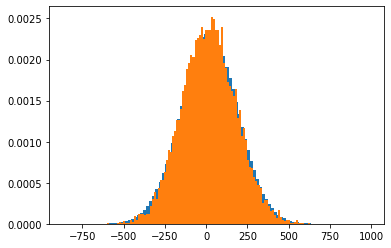

In [ ]:
plt.hist(population_men, bins=100, density=True);
plt.hist(population_women, bins=100, density=True);

# Задание № 3
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

* стандартное отклонение  σ=150 ;
* уровень доверия  β  = 95%;
* Погрешность  Δ=50  рублей.

In [ ]:
Z = 2.241
N =round((Z*150/50)**2)
N

45

# Задание №4
Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за 0.05 ( α=0.05 ).

In [ ]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [ ]:
oddsratio, pvalue = stats.fisher_exact(observations)
print('oddsratio=%.3f, pvalue=%.3f' % (oddsratio, pvalue))
if pvalue > 0.05:
    print('Маг не умеет предсказывать погоду')
else:
    print('Да ладно вам, просто выборка маловата')

oddsratio=0.581, pvalue=0.354
Маг не умеет предсказывать погоду


# Задание № 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия  β=90%  для выборки:

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [ ]:
def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [ ]:
mean_confidence_interval(data, confidence=0.90)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

# Задание № 6
Принадлежат ли выборки A и B одному множеству?

* Оцените это с помощью известных вам тестов для проверок статистических гипотез;
* Покажите различия визуально.

In [ ]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

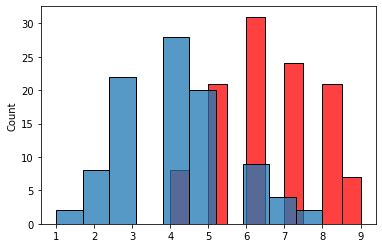

In [ ]:
sns.histplot(A, color='red',bins=10);
sns.histplot(B,bins=10);

In [ ]:
t, p = stats.ttest_ind(A, B)
print(t,p)

11.865233896372924 4.623319592204015e-25


In [ ]:
# p очень мало - не принадлежат одному множеству

# Задание № 7 (задание без подвоха)
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

* Предположим, Вы сформировали две гипотезы:
 * нулевая гипотеза - распределение нормальное;
 * альтернативная гипотеза - распределение ненормальное.
* допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)

In [ ]:
# На уровне значимости 0.05 можем считать гипотезу о нормальном распределении правильной.

# Задание № 8
Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

* Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 0.05 (5%))

* При каком минимальном p-value различия были бы уже значимы?

* Если выборки незначительно отличаются, то продемонстрируйте это визуально

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

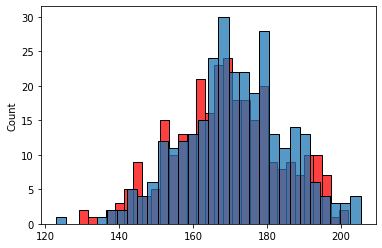

In [ ]:
sns.histplot(A, color='red', bins=30);
sns.histplot(B, bins=30);

In [ ]:
t, p = stats.ttest_ind(A, B)

print(t, p)

-1.95300880485141 0.051284593140469285


In [ ]:
# p больше уровня значимости (0.05), значит различия незначительные при p = 0.049 различия были бы уже значимы